# Spandan Computational Physics Final Exam

start time= 10/12/2022 at 13:00
end time: 11/12/2022 at 17:00

##### Expectation from the course: 
My expected course marks: 90ish marks 

Highest marks in the class: 95-97 marks 


In [1]:
#Libraries used in the examination
import numpy as np 
import matplotlib.pyplot as plt
from numba imort njit
plt.rcParams['figure.dpi']=100

## Pendulum

### Substituition and Proving the function's integrability 

The function given in the question is given as: 

$$T = \sqrt{\frac{l}{g}} \int_{-\alpha}^{\alpha} \frac{1}{\sqrt{\sin^2(\alpha/2) - \sin^2(\theta/2)}} d\theta$$

For small angle approximations, the time period of a harmonic oscillator is given by the equation,

$$T_0 = 2\pi\sqrt{\frac{l}{g}}$$

Substituting this function in the equation for $T$ gives,

$$T = \frac{T_0}{2\pi}\int_{-\alpha}^{\alpha} \frac{1}{\sin(\alpha/2)\sqrt{1 - \frac{\sin^2(\theta/2)}{\sin^2(\alpha/2)}}} d\theta$$

Assumoing $k = \sin(\alpha/2)$ and $\sin \phi = \frac{\sin(\theta/2)}{\sin(\alpha/2)}$. Then, we can take derivative with respect to $\theta$ to get,

$$\sin(\alpha/2)\cos \phi \frac{d\phi}{d\theta} = \frac{1}{2} \cos(\theta/2) \implies 2 \frac{\sin(\alpha/2)}{\cos \theta/2} \cos \phi d\phi = d\theta$$

For our :

$$\theta = -\alpha \to \phi = -\pi/2 \hspace{0.3cm} \text{and} \hspace{0.3cm} \theta = \alpha \to \phi = \pi/2$$

Using the above relations, we can write,

$$T = \frac{T_0}{2\pi} \int_{-\pi/2}^{\pi/2} \frac{2k\cos\phi d\phi}{k\cos(\theta/2) \sqrt{1 - \sin^2\phi}}$$

Using the identity for sines and cosines: 

$$T=\frac{T_0}{\pi} \int_{-\pi/2}^{\pi/2} \frac{\cos\phi d\phi}{\sqrt{1-\sin^2(\theta/2)} \cos \phi}$$

$$T= \frac{T_0}{\pi} \int_{-\pi/2}^{\pi/2} \frac{1}{\sqrt{1-\sin^2(\alpha/2)\sin^2\phi}}d\phi$$

Hence, the above can be simplified as,

$$T = \frac{T_0}{\pi} \int_{-\pi/2}^{\pi/2} \frac{1}{\sqrt{1-k^2\sin^2\phi}}d\phi$$

Hence, we have shown that the time period can be written as an elliptic integral of first kind. Now we can argue the integrability of this function in two ways. One is the theoretical approach which we can summarise as follows: 


##### Theoretical Approach: 
The integrand inside the integral for T is continuous except the endpoint values where it blows up. However when we consider the integral, and if we integrate over single points then they contribute nothing to the integral. Therefore we can argue that if we ignore the endpoint values,we will still obtain the same value for the integral.

##### Showing that integration exists through the binomial expansion of the function: 
Let us consider the integrand of the form: 

$$\frac{1}{\sqrt{1-z^2}}$$

If we use the generalised binomial theorem, we can rewrite the same function as: 

$$
\sum_{j \geq 0}\left(\begin{array}{c}
-\frac{1}{2} \\
i
\end{array}\right)\left(-z\right)^j 
$$

Plugging in the value for this binomial expansion yields: 

$$
\sum_{j \geq 0} \left(\prod_{m=1}^j \frac{\frac{1}{2}-m}{m}\right)(-1)^j z^{2j}
$$

Using $z=k^2\sin^2\phi$

$$\frac{1}{\sqrt{1-k^2\sin^2\phi}}$$


$$
\sum_{j \geq 0} \left(\prod_{m=1}^j \frac{\frac{1}{2}-m}{m}\right)(-1)^j k^{2j}\left(sin{\phi}\right)^{2j}
$$


Therefore our integral takes the form: 

$$T = \frac{T_0}{\pi} \int_{-\pi/2}^{\pi/2} \frac{1}{\sqrt{1-k^2\sin^2\phi}}d\phi$$

$$T = \frac{T_0}{\pi} \int_{-\pi/2}^{\pi/2}\sum_{j \geq 0} \left(\prod_{m=1}^j \frac{\frac{1}{2}-m}{m}\right)(-1)^j k^{2j}\left(sin{\phi}\right)^{2j}d\phi$$

Note that only the term $\sin^{2j}\phi$ is the term being integrated within the product and the sum. Hence we can cast our original equation as: 

$$
T=\frac{T_0}{\pi}\sum_{j \geq 0} k^{2 j}\left(\prod_{m=1}^i \frac{\frac{1}{2}-m}{m}\right)(-1)^j \int_{-\pi / 2}^{\pi / 2} \sin ^{2 j} \phi \mathrm{d} \phi
$$

Now the integration consists of the $\sin^2$ function raised to some power $j$ which has no discontinuities and is a known integrable function. Therefore since we can integrate $\sin^2$ we can also integrate the elliptic integral of the first kind. 

### Numerical integration of the elliptical integral

The following lines of code use the trapezoid method to integrate the function to give the time period T for any given value of alpha. This time period is normalised since we assume $T_0$ to be 1. Indicating that we are comparing our results with the case that we take for the simple pendulum

In [36]:
"The code for Trapezoidal integration"
#@njit (uncomment for speeding up code exponentially)
def trapezoid(alpha, l, u, n): #also takes alpha as an argument
    k = np.sin(alpha/2) #definition of k

    h = (u-l)/n                   # width of one block
    x = np.linspace(l, u, n)      # x values at the point when each block starts
    f = 1/np.sqrt(1 - (k*np.sin(x))**2)  # function given to integrate

    area = 0                      # initial area is taken to be 0

    for i in range(1, n-1):       # looping from the second point to the second last point
        area += f[i] * h          # add the area of the trapezoid for each block
    
    # add the area of the two triangles at the ends of the curve
    I = area + (h/2) * (f[0] + f[-1])

    return I

In [38]:
"Integrating and storing values of time period"
alpha=np.linspace(0,np.pi/2,1000) #alphas chosen
#note that the endpoints do not contribute
#much to the integral so we can keep them as our limits
T=np.zeros(len(alpha))
for i in range(len(alpha)):
    T[i]=(trapezoid(alpha[i],-np.pi/2,np.pi/2,int(1e4)))/np.pi

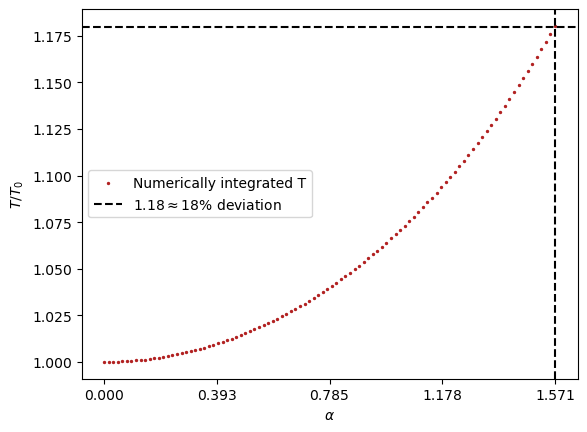

In [39]:
#Required for plotting the chosen array 
plt.scatter(alpha,T,c='firebrick',s=2,label='Numerically integrated T')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$T/T_0$')
plt.xticks(np.linspace(0,np.pi/2,5))
plt.axhline(1.18,label=r'$1.18\approx 18\%$ deviation',c='k',ls='--')
plt.axvline(np.pi/2,ls='--',c='k')
plt.legend()
plt.show()

The above plot indicates that if the maximum amplitude $\alpha$ is chosen to be 90 degrees, then the time period would be approximately 18 percent greater than that anticipated with the simple small angle approximation model. The error is less than 7% until the angle is 30 degrees. 

### Small angle behaviour

We consider the small angle to be until 6 degrees or 0.1 radians where the error is much lesser than 1%,hence we choose the alphas until 0.1 radians. Hence we rerun the integration program until 0.1 radians and just plot this behaviour. If we look at the solution of the elliptical integral (cited in the references), it can be approximated as a taylor expansion which gives the result:

$$
T=T_0\left(1+\frac{1}{16} \alpha^2+\frac{11}{3072} \alpha^4+\frac{173}{737280} \alpha^6+\frac{22931}{1321205760} \alpha^8....\right)
$$

This indicates that the leading coefficient would be the square term. If we do a quadratic fit for small angles we expect the fit to be in the form: 

$$ax^2+bx+c$$

comparing this with the expansion, we expect to get:

$a=\frac{1}{16}$,$b=0$,$c=1$

The following lines of code verify this relation:

In [52]:
# small angle array 
alpha_small=np.linspace(0,0.1,1000)
T_small=np.zeros(len(alpha_small))
for i in range(len(alpha_small)):
    T_small[i]=(trapezoid(alpha_small[i],-np.pi/2,np.pi/2,10_00))/np.pi

In [53]:
#creating variables for least square fitting
x=alpha_small 
y=T_small

In [54]:
#Best fit line the formula to calculate the coefficients needed to be initialised: 
n=len(x) 
sxx=np.sum(x**2)-(np.sum(x))**2/n
sxy=np.sum(x*y)-(np.sum(x)*np.sum(y))/n
sx3=np.sum(x**3)-(np.sum(x)*np.sum(x**2))/n
sx2y=np.sum(x**2*y)-(np.sum(x**2)*np.sum(y))/n
sx4=np.sum(x**4)-(np.sum(x**2))**2/n

In [55]:
#Implementing the formula 
a = ((sx2y*sxx)-(sxy*sx3))/((sxx*sx4)-(sx3)**2)


b = ((sxy*sx4)-(sx2y*sx3))/((sxx*sx4)-(sx3)**2)


c = np.sum(y)/n-b*np.sum(x)/n-a*np.sum(x**2)/n


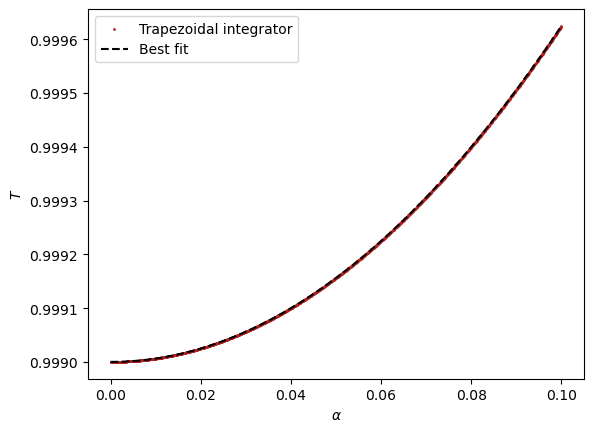

In [56]:
#plotting best fit and raw data 
plt.scatter(x,y,s=1,c='firebrick',label='Trapezoidal integrator')
plt.plot(x,a*x**2+b*x+c,c='k',ls='--',label='Best fit')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$T$')
plt.legend()
plt.show()

In [57]:
print('a=',np.round(a,5),'b=',np.round(b,5),'c=',np.round(c,5))

a= 0.0625 b= -0.0 c= 0.999


As discussed earlier, our fit is very close to the anticipated values. The value of a is almost 1 over 16 and the value of c is almost 1. Therefore the elliptical integral can be considered to be successfull in our fits. To check the apropriateness of the fit, we can also calculate its $r^2$ value. The lines below indicate the findings from the $r^2$ values:

In [27]:
y_pred=a*x**2+b*x+c
y_true=y

sse = sum((y_pred - y_true) ** 2)

# Calculate the total sum of squares
sst = sum((y_true - y_true.mean()) ** 2)

# Calculate the coefficient of determination (R^2)
r2 = 1 - (sse / sst)

print('The r^2 value for the goodness of fit is approximately',r2)

The r^2 value for the goodness of fit is approximately 0.999999994613428


These values prove that the leading order polynomial in the expansion of the Time period is the quadratic term, and there is an absence of a linear term. 

## Random Walker with Trap

My approach to answer this question includes the following idea. Let us say we are an observer far away from the lattice. We have decided to observe the system until 10_000 steps. We start with one walker and let them walk until they reach the trap or reach 10_000 steps. If they reach 10_000 steps, then we conclude that the walker is alive until this point. If they reach the trap in 100 steps, then we consider them to be alive until the 100th step and then we no longer consider them from thhe 101th step to 10_000th step. Hence if we repear this experiment for multiple walkers (100_000 for our experiment) we can know how many of these made it to the 10_000th step and how many did not, this allows us to count the number of people alive at any given step. 

In [12]:
#Counting how many steps a single walker takes#
#@njit (uncomment for speeding up code exponentially)
def counting_steps():
    i=0 #start the steps at 0
    s=0 #the array to store displacement 
    mx=10_000 #the point we have decided to look until (the third observer)
    while s<10 and i<mx: #if displacement is less than 10
        #or if total steps are less than 10_000 since we only observe till then
        i+=1 #adding a step 
        r=np.random.random() #choose a random number 
        if r<=0.5: #move one step forward 
            s+=1
        else:
            s-=1 #move one step backward 
    return i    #obtain total steps  

In [13]:
#Seeing multiple walkers#
#@njit (uncomment for speeding up code exponentially)
def Walkers(itr): #repeat this for itr walkers 
    trials=np.zeros(itr)
    for i in range(itr):
        x=counting_steps()
        trials[i]=x #storing when walker is trapped
        
    steps=np.arange(0,10_000,1) #see each step 
    alive=np.zeros(10_000) #how many people alive at each step
    for i in range(10_000):
        for j in range(len(trials)):
            if trials[j]>i: 
                alive[i]+=1
# until they die, they contribute to each step 
    Probability=alive/itr #success over iterations
    
    return steps,Probability

In [14]:
%%time
steps,prob=Walkers(1000) #done for 1000 walkers

CPU times: user 22.4 s, sys: 264 ms, total: 22.7 s
Wall time: 22.4 s


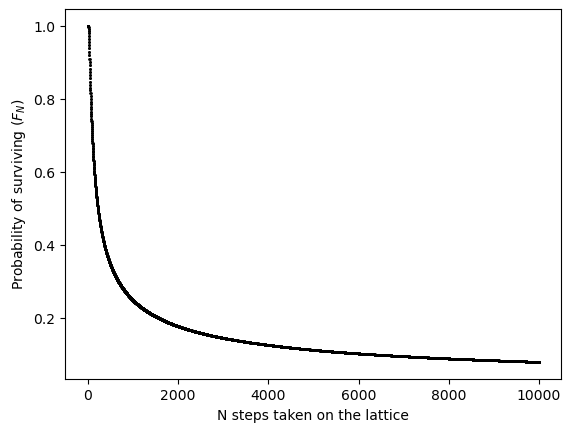

In [15]:
#Plotting Steps as a function of probability
plt.scatter(steps,prob,s=1,c='k')
plt.xlabel('N steps taken on the lattice')
plt.ylabel(r'Probability of surviving ($F_N$)')
plt.show()

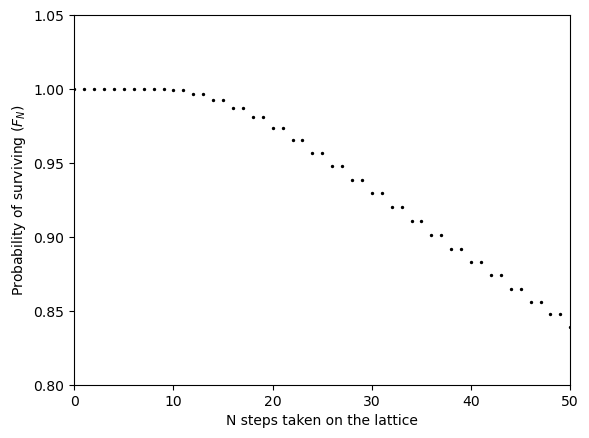

In [16]:
#focusing on a specific region to verify the answer
plt.scatter(steps,prob,c='k',s=2)
plt.xlim(0,50)
plt.ylim(0.8,1.05)
plt.xlabel('N steps taken on the lattice')
plt.ylabel(r'Probability of surviving ($F_N$)')
plt.show()

We observe an exponential decay as the number of steps increase, indicating that for larger the steps, there is a smaller chance of surviving. However, we also realise that there is always a probability of divergence where they may never reach the trap. It is obvious that we need at least 10 steps to reach the trap, and hence we would expect all walkers to always survive till the 10th step. There is a small chance of being trapped at 10 steps, and then it keeps increasing, and hence the probability of being untrapped keeps falling. 

## DNA sequencing

In [17]:
# "This includes all codes for DNA sequencing "

# "The first code creates a random DNA sequence"
#RANDOM PROBABILITIES
def sequence(N):
    sequence=[] 
    
    for i in range(N):
        # we have chosen equal probabilities for all 
        rand=np.random.random()#generate N random numbers
        if rand<=0.25: 
            sequence.append(0) #A
        
        elif 0.25<rand<=0.5:
            sequence.append(1) #C
            
        elif 0.5<rand<=0.75:
            sequence.append(2)#G
            
        elif 0.75<rand<=1:
            sequence.append(3)#T
  
    return np.array(sequence) #gives array 

# "Just wrote one extra code to convert our genes to words"
def gene_in_words(sequence):
    words=[]
    for i in range(len(sequence)):
            if int(sequence[i])==0:
                words.append('A')
            elif int(sequence[i])==1:
                words.append('C')
            elif int(sequence[i])==2:
                words.append('G')
            elif int(sequence[i])==3:
                words.append('T')
    return print(*words,sep='')

# "16 hashcodes converts to base 10"
def hashcode(genes):
    code=np.zeros(len(genes)-1) #there is one less pair than total bases
    for i in range(len(genes)-1): #runs through each base
        code[i]=genes[i]*4+genes[i+1] #converts all paris between 0 to 15
    return code #gives all unique codes of hashes 

# "Same sequencing but different probabilities"
def DNA_seq(N):
    
    sequence=[]
    
    for i in range(N):
        #customised probabilities from the question
        rand=np.random.random()
        if 0<rand<=0.3:
            sequence.append(0)
        
        elif 0.3<rand<=0.5:
            sequence.append(1)
            
        elif 0.5<rand<=0.7:
            sequence.append(2)
            
        elif 0.7<rand<=1:
            sequence.append(3)
  
    return np.array(sequence)

# "Creating a histogram and visualising it"
def create_N_hist(N,uniform=True):
    hash_codes=['AA','AC','AG','AT','CA','CC','CG','CT','GA','GC','GG','GT','TA','TC','TG','TT'] #VISUALISATION
    if uniform==True: #If we look at uniform probabilities
        genes=sequence(N) #create gene sequence
        hashes=hashcode(genes) #create their hash codes
        x,y=np.unique(hashes,return_counts=True) #see how many of each we have
        fig, ax1= plt.subplots()
        ax1.bar(x,y/len(hashes),color='teal') #divide by number of hashes to get probability density
        ax1.set_xlabel('Hash Code')
        ax1.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
        ax1.set_ylabel('P(Hash Code)')
        secax = ax1.secondary_xaxis('top')
        secax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
        secax.set_xticklabels(hash_codes)
    else:
        #The same as above but different probabilities 
        genes=DNA_seq(N)
        hashes=hashcode(genes)
        x,y=np.unique(hashes,return_counts=True)
        fig, ax1= plt.subplots()
        ax1.bar(x,y/len(hashes),color='grey')
        ax1.set_xlabel('Hash Code')
        ax1.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
        ax1.set_ylabel('P(Hash Code)')
        secax = ax1.secondary_xaxis('top')
        secax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
        secax.set_xticklabels(hash_codes)

In [18]:
#Showing sample genes and their conversion 
genes=DNA_seq(10)
print(genes)
gene_in_words(genes) 

[1 1 0 0 3 0 0 1 0 3]
CCAATAACAT


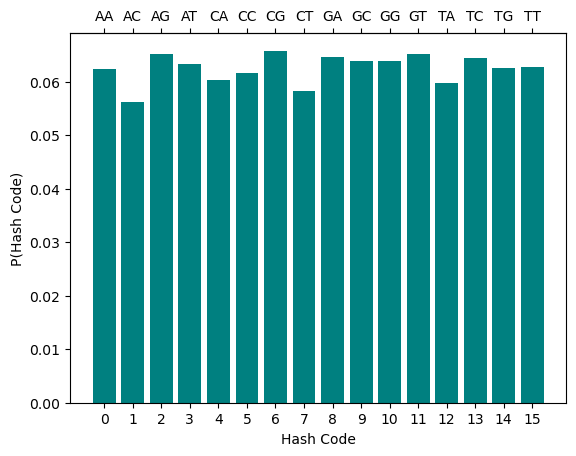

In [19]:
# Creating a histogram of 10_000 sequences
#The actual human dna has about 21 billion 
create_N_hist(10000,uniform=True)

For all probabilities that are uniform, there is no fixed pattern in the distribution of the hash codes. This is very similar to the uniform deviate.

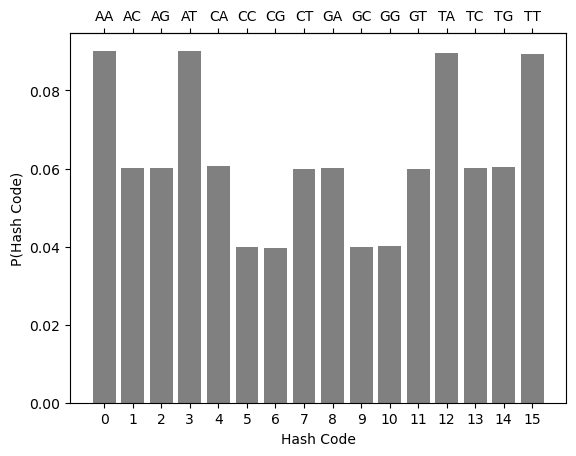

In [20]:
#Customised probabilities 
create_N_hist(10_00_000,uniform=False)

When we specify different probabilities, we notice that some hashcodes become more probable than other ones. Four base pairs, the AA, AT,TA,TT become almost equally probable (the most probable). CC,CG and GC,GG become least probable. 

## Julia Sets

The julia sets were created using the iteration count. We first create some complex numbers on the grid. We pass the complex number through the iteration process and see whether it diverges or not. If we have a complex number (x+iy) it maps onto a lattice with coordinate (x,y). The colour of that lattice point is given by its count, and hence the darker points are those that have 80 iterations. The following are the functions and their resulting images:

In [21]:
#@njit (uncomment for speeding up code exponentially)
def julia(z): #takes a complex number as input
    n = 0 # counts iterations 
    max_itr=80 #maximum iterations
    while abs(z)<20 and n <= max_itr: #until this condition
        z=((z**2+2)/(1+2*z))**2 #iterate this complex number
        n += 1 # add to the iteration
    return n #obtain the number of iterations 

In [29]:
#code for visualisation 
def julia_set_visualise(N,xmin,xmax,ymin,ymax):
    #takes the ranges 
    x=np.linspace(xmin,xmax,N) #create x values 
    y=np.linspace(ymin,ymax,N) #create y values 
    X, Y = np.meshgrid(x, y)#creates a grid of these values 
    z = X + 1j *Y #creates a list of complex numbers on the lattice
    ctr = np.zeros_like(z,dtype=int) # seeing whether these points converge or diverge
    for i in range(N): # for all x coords
        for j in range(N): #for all y coords
            ctr[i, j] = julia(z[i, j])
            #run the julia code and seeing their iterations
    plt.imshow(ctr, cmap="binary",extent=[xmin,xmax,ymin,ymax])
    plt.colorbar()
    #imshow takes the counter as pixel values 
    #extent uses the range that we specified 
    #cmap is binary since we see if they converge or diverge
    plt.xlabel('Real axis (x)')
    plt.ylabel('Imaginary axis (y)')
    
    plt.show()

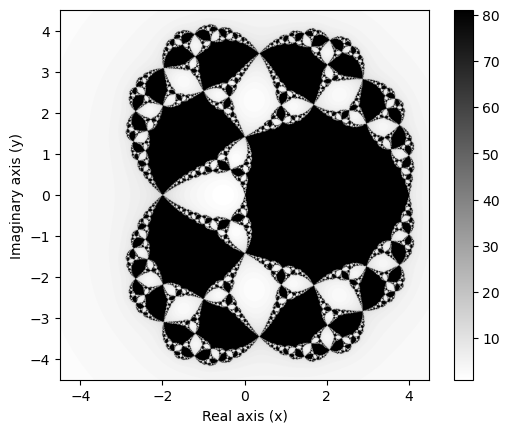

In [30]:
#general range for julia sets 
#1000*1000 image 
xmin, xmax, ymin, ymax = -4.5, 4.5, -4.5, 4.5
julia_set_visualise(1000,xmin,xmax,ymin,ymax)

We see that there are fractal patterns forming in the image. There is a large bulb that is dark and then these seperate into smaller segments which then seperate into smaller chunks. 

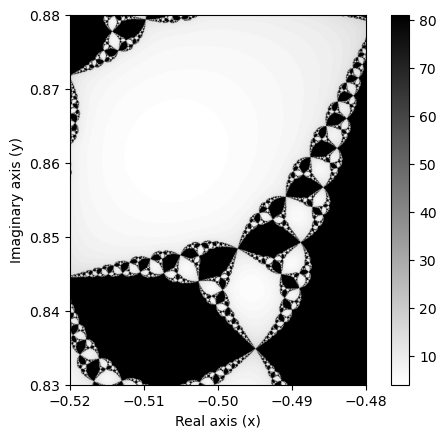

In [31]:
#zoomed in values 
#1000*1000 image
xmin, xmax, ymin, ymax = -0.52, -0.48, 0.83, 0.88
julia_set_visualise(1000,xmin,xmax,ymin,ymax)

The zoomed in segments of the julia set show the branching more clearly, if we focus on the bordering fractals, we see that they are identical and they get smaller in size as we move away from the centeral bulb at -0.495. as we move -0.495 to -0.52, these bordering fractals reduce size. The same happens vertically as we go until 0.88. 

On an unrelated note: These look so pretty!

## References: 

1)Thornton, Stephen T., and Jerry B. Marion. Classical dynamics of particles and systems. Cengage Learning, 2021.

2)https://proofwiki.org/wiki/Complete_Elliptic_Integral_of_the_First_Kind_as_Power_Series

3)https://mathworld.wolfram.com/LebesgueIntegrable.html

4)http://www.uwosh.edu/faculty_staff/kuennene/Chaos/ChaosNotes8.pdf

5)https://rosettacode.org/wiki/Julia_set

6)https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html


<center>
----------------------------END----------------------------